Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file.

In [1]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()

## Make a PMF of <tt>numkdhh</tt>, the number of children under 18 in the respondent's household.

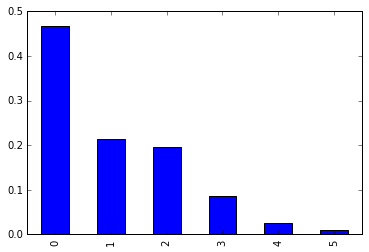

In [2]:
ts = resp.numkdhh
pmf = ts.value_counts().sort_index() / len(ts)
pmf.plot(kind='bar')

# Using PMF Mean in Thinkstats

In [4]:
import thinkstats2
import numpy as np
d = { 7: 8, 12: 8, 17: 14, 22: 4, 27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }
pmf = thinkstats2.Pmf(d, label='actual')
print('mean', pmf.Mean())


mean 23.6923076923077


In [5]:
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

# 3.1 Pmfs

In [25]:
# Organization for this book--not so good. Had to hunt to accumulate the code needed
import math
import numpy as np
import nsfg
import thinkstats2
import thinkplot

# A Method
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
n = hist.Total()
d = {}
for x, freq in hist.Items():
    d[x] = freq / n

# B Method
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf




Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

## 3.3 Other Visualizations

In [34]:
# Organization for this book--not so good. Had to hunt to accumulate the code needed :\
import math
import numpy as np
import nsfg
import thinkstats2
import thinkplot

preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

weeks = range(35, 46)
diffs = []

first_pmf = thinkstats2.Pmf(firsts.prglngth, label='first')
other_pmf = thinkstats2.Pmf(others.prglngth, label='other')

for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    print(week,p1,p2)
    diff = 100 * (p1 - p2)
    diffs.append(diff)
    


#thinkplot.Bar(weeks, diffs)



35 0.0360299116247 0.0321013727561
36 0.0389757534557 0.0314677930306
37 0.0471334692953 0.0521647307286
38 0.0616360752323 0.0707497360084
39 0.479039202357 0.544667370644
40 0.121459324722 0.122492080253
41 0.0815771583956 0.0479408658923
42 0.046453659642 0.0259767687434
43 0.0197144799456 0.0128827877508
44 0.00521187400861 0.00485744456177
45 0.00135961930659 0.000844772967265


# Figure 3.1


'\nthinkplot.PrePlot(2)\nthinkplot.SubPlot(2)\nthinkplot.Pmfs([first_pmf, other_pmf])\n\n\n# plot the differences in the PMFs\nweeks = range(35, 46)\ndiffs = []\nfor week in weeks:\n    p1 = first_pmf.Prob(week)\n    p2 = other_pmf.Prob(week)\n    diff = 100 * (p1 - p2)\n    diffs.append(diff)\n\nthinkplot.Bar(weeks, diffs)\n'

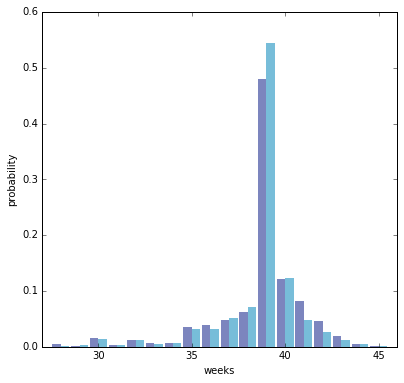

In [39]:
first_pmf = thinkstats2.Pmf(firsts.prglngth, label='first')
other_pmf = thinkstats2.Pmf(others.prglngth, label='other')
width = 0.45

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='weeks',
                 ylabel='probability',
                 axis=[27, 46, 0, 0.6])



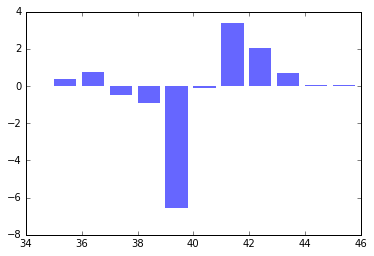

In [40]:
"""
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
"""

# plot the differences in the PMFs
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs)

In [41]:
# 3.4
d = { 7: 8, 12: 8, 17: 14, 22: 4, 27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }
pmf = thinkstats2.Pmf(d, label='actual')
print('mean', pmf.Mean())

mean 23.6923076923077


Define <tt>BiasPmf</tt>.

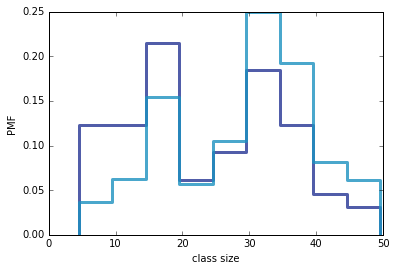

In [46]:
# 3.4 
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

d = { 7: 8, 12: 8, 17: 14, 22: 4, 27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

pmf = thinkstats2.Pmf(d, label='actual')
biased_pmf = BiasPmf(pmf, label='observed')

thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel='class size', ylabel='PMF')

Make a the biased Pmf of children in the household, as observed if you surveyed the children instead of the respondents.

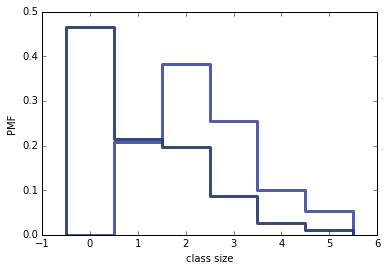

In [55]:
#resp = chap01soln.ReadFemResp()

def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

ts = resp.numkdhh
pmf = thinkstats2.Pmf(ts, label='actual')
biased_pmf = BiasPmf(pmf, label='observed')
#pmf, biased_pmf

thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel='class size', ylabel='PMF')

Display the actual Pmf and the biased Pmf on the same axes.

Compute the means of the two Pmfs.